In this notebook the goal is to take an input image, perform ROI (Region Of Interest) detection. This is done using the Differentiable Binarization method.

In [1]:
import numpy as np
import cv2

In [17]:
# Load the black and white image
img = cv2.imread("/home/said/courses/Projet Info/sports_scr/data/natation/000000.png")

In [18]:
img.shape

(720, 1280, 3)

In [19]:
# Perform connected-component labeling
ret, labels = cv2.connectedComponents(img[:,:,0])

In [20]:
ret

253

In [21]:
labels

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

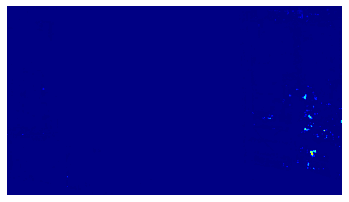

In [24]:
import matplotlib.pyplot as plt

# Plot the connected components using a color map
plt.imshow(labels, cmap='jet')
plt.axis('off')
plt.show()

In [ ]:
# Merge the connected components into larger regions
for label in range(1, ret):
    # Get the binary mask for the current label
    mask = (labels == label)

    # Perform morphological operations to fill the holes and smooth the boundaries
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))

    # Assign the new values to the original image
    img[mask] = 255

# Save the result
#cv2.imwrite('output.png', img)